# Data Modelling and Evaluations

As we have completed the Exploratory Data Analysis, we have obtained an overview on the specifics of each attributes in the dataset.

Further on, we proceed to handle outliers and missing values in few attributes that were found from previous EDA.

## Topic of Contents:
* [Understanding Data](#first-bullet)
* [Basic Data Analysis](#second-bullet)
* [Effects of banking data on Term Deposit](#third-bullet)
* [Effect of Campaign on Term Deposit](#four-bullet)
* [Additional Attribute Effects](#five-bullet)
* [Data Preprocessing](#six-bullet)
* [Data Modelling](#seven-bullet)
* [Model Analysis](#eight-bullet)
* [Results](#nine-bullet)
* [Future Leads to Marketing Campaigns](#ten-bullet)


In [ ]:
# Importing Data

In [ ]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings

from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [324]:
path = 'C:/Users/MANEET/bank_marketing'
data_add = '/data'
report_add = '/report'
figures_add = '/figures'
experiment_add = '/experiments'

## Import processed data which is ready for modelling

In [349]:
X_over_preprocessed= pd.read_csv(path + data_add + '/processed/Over_processed_features.csv')
y_over_preprocessed= pd.read_csv(path + data_add + '/processed/Over_processed_labels.csv',index_col = 0)
X_over_preprocessed.shape, y_over_preprocessed.shape

((73096, 63), (73096, 1))

In [350]:
X_under_preprocessed= pd.read_csv(path + data_add + '/processed/Under_processed_features.csv')
y_under_preprocessed= pd.read_csv(path + data_add + '/processed/Under_processed_labels.csv',index_col = 0)
X_under_preprocessed.shape, y_under_preprocessed.shape

((9280, 63), (9280, 1))

In [351]:
X_raw_preprocessed = pd.read_csv(path + data_add +'/processed/Raw_processed_features.csv')
y_raw_preprocessed = pd.read_csv(path + data_add + '/processed/Raw_processed_labels.csv',index_col = 0)
X_raw_preprocessed.shape, y_raw_preprocessed.shape

((41188, 63), (41188, 1))

## Data Modelling <a class="anchor" id="seven-bullet"></a>

In [352]:
import time
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score

# Assigning dictionary of models
dict_classifiers = {
    "Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier()
}


In [353]:
# Defining a function to test classifiers with 3 fold cross validation to form a baseline performance

no_classifiers = len(dict_classifiers.keys())

def cv_model(X_train,Y_train,verbose = True):
    df_results = pd.DataFrame()
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.clock()
        cross_val = cross_val_score(classifier,X_train, Y_train, cv = 3)
        t_end = time.clock()
        t_diff = t_end - t_start
        df_results.loc[count,'Classifier'] = key
        df_results.loc[count,'Total_time'] = t_diff
        df_results.loc[count,'Cross Val Mean Score'] = cross_val.mean()
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

### Using Raw Preprocessed Data

In [354]:
cv_raw_results = cv_model(X_raw_preprocessed.values,y_raw_preprocessed.values)
cv_raw_results = cv_raw_results.sort_values(by='Cross Val Mean Score', ascending=False)
print(cv_raw_results)

trained Nearest Neighbors in 35.87 s
trained Random Forest in 12.66 s
trained Gradient Boosting Classifier in 43.13 s
                     Classifier  Total_time  Cross Val Mean Score
2  Gradient Boosting Classifier   43.134258              0.567682
1                 Random Forest   12.656474              0.357081
0             Nearest Neighbors   35.873179              0.335667


<b>Lets evaluate the best performing model on test set</b>

In [355]:
X_train, X_test, y_train, y_test = train_test_split(X_raw_preprocessed, y_raw_preprocessed, test_size=0.20)
best_clf = dict_classifiers.get(cv_raw_results.Classifier.iloc[0])
best_clf.fit(X_train,y_train)
y_pred = best_clf.predict(X_test)

In [357]:
X_train.to_csv(path + experiment_add + '/raw_X_train.csv')
X_test.to_csv(path + experiment_add + '/raw_X_test.csv')
y_train.to_csv(path + experiment_add + '/raw_y_train.csv')
y_test.to_csv(path + experiment_add + '/raw_y_test.csv')
np.savetxt(path + experiment_add + '/raw_y_pred.csv', y_pred, delimiter=",")

In [358]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7278
           1       0.68      0.53      0.59       960

    accuracy                           0.92      8238
   macro avg       0.81      0.75      0.77      8238
weighted avg       0.91      0.92      0.91      8238



### Experiment using Undersampling

In [383]:
cv_under_results = cv_model(X_under_preprocessed.values,y_under_preprocessed.values)
cv_under_results = cv_under_results.sort_values(by='Cross Val Mean Score', ascending=False)
print(cv_under_results)

trained Nearest Neighbors in 1.91 s
trained Random Forest in 2.05 s
trained Gradient Boosting Classifier in 4.15 s
                     Classifier  Total_time  Cross Val Mean Score
0             Nearest Neighbors    1.910480              0.833306
2  Gradient Boosting Classifier    4.154516              0.833306
1                 Random Forest    2.046174              0.708852


<b>Lets evaluate the best performing model on test set</b>

In [384]:
X_train, X_test, y_train, y_test = train_test_split(X_under_preprocessed, y_under_preprocessed, test_size=0.20)
best_clf = dict_classifiers.get(cv_under_results.Classifier.iloc[0])
best_clf.fit(X_train,y_train)
Under_labels= best_clf.predict(X_test)

In [385]:
X_train.to_csv(path + experiment_add + '/undersampled_X_train.csv')
X_test.to_csv(path + experiment_add + '/undersampled_X_test.csv')
y_train.to_csv(path + experiment_add + '/undersampled_y_train.csv')
y_test.to_csv(path + experiment_add + '/undersampled_y_test.csv')
np.savetxt(path + experiment_add + '/undersampled_y_pred.csv', Under_labels, delimiter=",")

In [388]:
print(metrics.classification_report(y_test,Under_labels))

              precision    recall  f1-score   support

           0       0.52      0.49      0.50       933
           1       0.51      0.54      0.52       923

    accuracy                           0.51      1856
   macro avg       0.51      0.51      0.51      1856
weighted avg       0.51      0.51      0.51      1856



### Using Oversampling method

In [ ]:
cv_over_results = cv_model(X_over_preprocessed,y_over_preprocessed)

In [272]:
cv_over_results = cv_over_results.sort_values(by='Cross Val Mean Score', ascending=False)
print(cv_over_results)

                     Classifier  Total_time  Cross Val Mean Score
2  Gradient Boosting Classifier   58.776295              0.695113
1                 Random Forest    6.546479              0.578008
0             Nearest Neighbors  154.185037              0.556843


In [399]:
X_train, X_test, y_train, y_test = train_test_split(X_over_preprocessed, y_over_preprocessed, test_size=0.20)
best_clf = dict_classifiers.get(cv_raw_results.Classifier.iloc[0])
best_clf.fit(X_train,y_train)
over_labels = best_clf.predict(X_test)
print(metrics.classification_report(Y_test_over,Y_pred_over))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      7322
           1       0.86      0.93      0.89      7298

    accuracy                           0.89     14620
   macro avg       0.89      0.89      0.89     14620
weighted avg       0.89      0.89      0.89     14620



In [ ]:
X_train.to_csv(path + experiment_add + '/Oversampled_X_train.csv')
X_test.to_csv(path + experiment_add + '/Oversampled_X_test.csv')
y_train.to_csv(path + experiment_add + '/Oversampled_y_train.csv')
y_test.to_csv(path + experiment_add + '/Oversampled_y_test.csv')
np.savetxt(path + experiment_add + '/Oversampled_y_pred.csv', Under_labels, delimiter=",")

## Based on the results obtained I will finetune all 3 models only using the oversampled data. This is party because undersampling eliminates 80% of the data limiting model to generalize. 

In [ ]:
# Calling Random Forest Classifier
rfc=RandomForestClassifier(random_state=42)

In [ ]:
# Setting the grid parameters
param_grid = { 
    'n_estimators': np.arange(2,19,3),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6],
    'criterion' :['gini', 'entropy']
}

In [ ]:
# Evaluating the grid parameters
X_train, X_test, y_train, y_test = train_test_split(X_over_preprocessed, y_over_preprocessed, test_size=0.20)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
CV_rfc.fit(X_train, y_train)

In [400]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 11}

In [401]:
finetune_rf = CV_rfc.best_estimator_
finetune_rf.fit(X_test,y_test)
rf_pred = finetune_rf.predict(X_test)


In [402]:
print(metrics.classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7427
           1       0.95      0.94      0.94      7193

    accuracy                           0.95     14620
   macro avg       0.95      0.95      0.95     14620
weighted avg       0.95      0.95      0.95     14620



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

k_range = list(range(3, 10 ,2))
# we create a list
weight_options = ['uniform', 'distance']
param_dist = dict(n_neighbors=k_range, weights=weight_options)
# Another parameter besides k that we might vary is the weights parameters
# default options --> uniform (all points in the neighborhood are weighted equally)
# another option --> distance (weights closer neighbors more heavily than further neighbors)


knn = KNeighborsClassifier()
rand = RandomizedSearchCV(knn, param_dist, cv=3, scoring='accuracy', random_state=5, n_jo)

# fit
rand.fit(X_train, y_train)

In [403]:
# examine the best model
print(rand.best_score_)
print(rand.best_params_)
print(rand.best_estimator_)

0.9279533483822423
{'weights': 'distance', 'n_neighbors': 3}
KNeighborsClassifier(n_neighbors=3, weights='distance')


In [404]:
finetune_rand = rand.best_estimator_
finetune_rand.fit(X_train,y_train)
knn_pred = finetune_rand.predict(X_test)
print(metrics.classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7427
           1       0.95      0.91      0.93      7193

    accuracy                           0.93     14620
   macro avg       0.94      0.93      0.93     14620
weighted avg       0.94      0.93      0.93     14620



In [ ]:
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=3, n_jobs=-1)

clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.best_params_)

result = clf.predict(X_test)


In [ ]:
tune_clf = clf.best_estimator_
tune_clf.fit(X_train,y_train)
GB_pred = tune_clf.predict(X_test)
print(metrics.classification_report(y_test,GB_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7427
           1       0.94      0.94      0.94      7193

    accuracy                           0.94     14620
   macro avg       0.94      0.94      0.94     14620
weighted avg       0.94      0.94      0.94     14620



In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier(estimators = [("rf",finetune_rf),("knn",finetune_rand),("gnb",tune_clf)], voting = 'hard',n_jobs = -1)
ensemble.fit(X_train,y_train)

##  Model Analysis <a class="anchor" id="eight-bullet"></a>

In [ ]:
final_preds = ensemble.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test,final_preds))

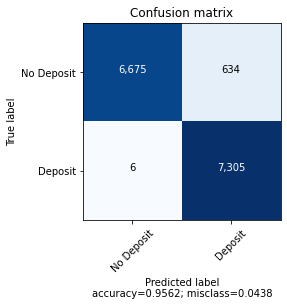

In [309]:
fig = plot_confusion_matrix(metrics.confusion_matrix(y_test,final_preds), target_names= ['No Deposit', 'Deposit'], normalize=False)
# plt.savefig(path + figures_add + '/Ensemble_CM.png')
plt.show(fig)

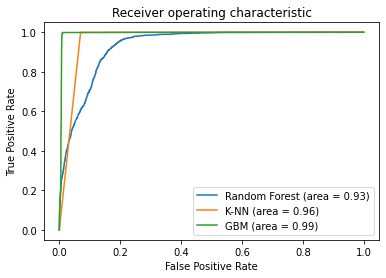

In [279]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

baseline_roc_auc = roc_auc_score(y_test, finetune_rf.predict_proba(X_test)[:,1])
fprB, tprB, thresholdsB = roc_curve(y_test, finetune_rf.predict_proba(X_test)[:,1])

model1_roc_auc = roc_auc_score(y_test, finetune_rand.predict_proba(X_test)[:,1])
fpr1, tpr1, thresholds1 = roc_curve(y_test, finetune_rand.predict_proba(X_test)[:,1])

new_roc_auc = roc_auc_score(y_test, tune_clf.predict_proba(X_test)[:,1])
fprnew, tprnew, thresholds_new = roc_curve(y_test, tune_clf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fprB, tprB, label='Random Forest (area = %0.2f)' % baseline_roc_auc)
plt.plot(fpr1, tpr1, label='K-NN (area = %0.2f)' % model1_roc_auc)
plt.plot(fprnew, tprnew, label='GBM (area = %0.2f)' % new_roc_auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (Ensemble Classifer)')
plt.legend(loc="lower right")
plt.show()

### Calculating the feature importances using the best fit random forest classifier

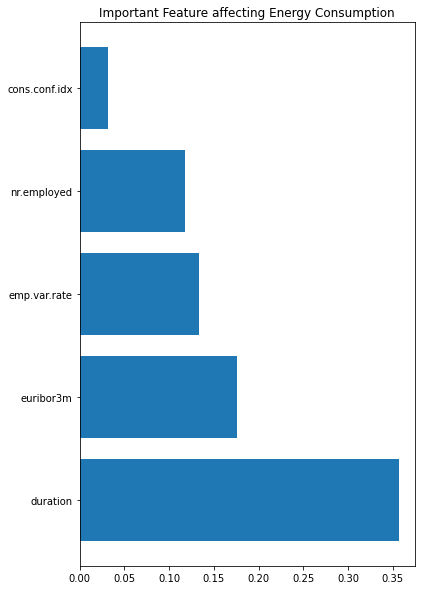

In [310]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)
    plt.figure(figsize = [6,10])
    plt.title("Important Feature affecting Energy Consumption")
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

# passing our column names
feature_names = X_train.columns 

# calling feature importance function to plot the most important features for energy consumption
f_importances((finetune_rf.feature_importances_), feature_names, top=5)

In [314]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(4,4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
#     plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.3f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()